## Executive Summary
#### This project analyzes airbnb in Los Angeles datasets containing listing and reviews from insidearibnb.com. There are two parts: 1) quantitative analysis, including ten data science questions; 2) data visualization, including five interesting business questions. 

The first question in part 2 talks about the most expensive day in the 2019 Thanksgiving break. From the result we can see that 11/29/2019 has the highest price. The reason should be that 11/29/2019 is the day after Thanksgiving and is a Friday. On that day, people wanted to hold parties. Renting airbnbs was a smart choice. So the landlord chose to increase price to be more profitable.

From the dataframe showed is the question 2, we can see the average price and square feet of each neighbourhood in Los Angeles. From two horizontal bar plots next, we can directly tell that Rolling Hill has the highest average price and Studio City has the largest average square feet.

The relationship between 'description' and 'reviews per month' is positive. This result is easy to predict since people prefer to choose airbnbs with more descriptions. The more people live in, the more comments they leave.

More bedrooms does not mean the higher prices. From the plot, we can see that most airbnbs have less than 10 bedrooms. Airbnbs with extremely more bedrooms, tend to have lower prices. From the second plot in question 4, we can conclude that reviews per month negatively influence the prices. The reason could be that people prefer to choose cheaper airbnb. So there are less reviews in comparatively expensive houses. From the third plot we can see that there is specfic relationship between price and latitude. However, the plot shows that prices of airbnbs around latitude 34 are higher. So we know that the neighborhood around latitude 34 are more popular. 

Prices in 2020 January will first start at the highest value at 245, then drop until 9th of the month. The price starts to fluctuate around 215 in the rest of the month. The average price is 218.93 and standard deviation is 9.34. This suggests the start of next year the house market is not so promising. 

## Part 1

### Quantitative Anaysis

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?

**Question 1 Answer:**

number of unique listings: 45053

number of unique host: 26286



In [1]:
import pandas as pd
from pandasql import sqldf
df_listings = pd.read_csv("./data/listings.csv")
df_calendar = pd.read_csv("./data/calendar.csv")
df_reviews = pd.read_csv("./data/reviews.csv")

FileNotFoundError: [Errno 2] File b'./data/listings.csv' does not exist: b'./data/listings.csv'

In [ ]:
num_of_uniq_listings=sqldf("SELECT count(id) FROM df_listings")
num_of_uniq_hosts=sqldf("SELECT count(distinct host_id) FROM df_listings")
print("Number of unique listings:",int(num_of_uniq_listings["count(id)"]))
print("Number of unique hosts:",int(num_of_uniq_hosts["count(distinct host_id)"]))

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

mean:        1.713954

std:  2.999183

median:      1.000000

max:      172.000000

min:        1.000000



In [ ]:
import numpy as np
result=df_listings.groupby(by='host_id')["id"].count().agg([np.mean,np.std,np.median,np.max,np.min])
print(result)

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

for super hosts:
mean    1.824264
std     3.177892

for non-super hosts
mean    1.671021
std     2.926276

super hosts have more listings

In [ ]:
# dataframe a contains the statistics of superhosts
a=df_listings[df_listings["host_is_superhost"]=="t"]
super=a.groupby(by='host_id')["id"].count().agg([np.mean,np.std])

# dataframe b contains the statistics of nonsuperhosts
b=df_listings[df_listings["host_is_superhost"]=="f"]
nonsuper=b.groupby(by='host_id')["id"].count().agg([np.mean,np.std]) 

print(nonsuper)
print(super)



### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

'email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual', 'work_email', 'manual_online', 'manual_offline', 'google', '', 'sent_id', 'None', 'sesame', 'sesame_offline', 'photographer', 'zhima_selfie', 'weibo'

The length of the list is 22

In [ ]:
types=sqldf("select distinct host_verifications as types from df_listings")
type_list=[]
for i in types["types"]:
    l=i.strip("[]").split(",")
    for j in l:
        j=j.strip("'' ")
        if j not in type_list:
            type_list.append(j)
print(type_list)
len(type_list)

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

Five most popuar types of hosts:
'phone' 'email','reviews', ('government_id', 'jumio'

0.996766 percent of hosts use 'phone' for verifications

0.938370 percent of hosts use 'email' for verifications

0.688541 percent of hosts use 'reviews' for verifications

0.587689 percent of hosts use 'government_id' for verifications

0.433387 percent of hosts use 'jumio' for verifications

In [ ]:
veri_dict={name:0 for name in type_list if name!="" and name !='None'}
veri_name=[]
number_hosts=len(df_listings['host_id'].unique())
for index,row in df_listings.iterrows():
    new_list=[t.strip().strip("'") for t in row["host_verifications"].strip("][").split(",")]
    row_name=row["host_id"]
    if row_name not in veri_name:
        veri_name.append(row_name)
        for every in new_list:
            if every in veri_dict.keys():
                veri_dict[every]+=1
top5_list=sorted(veri_dict.items(),key = lambda x:x[1],reverse = True)[0:5]  
top5_list
[[i[0],str(round(i[1]/number_hosts,4)*100)+"%"] for i in top5_list]

### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

mean: 254.77822712824937

std: 684.7417674825136

In [ ]:
df_calendar["date"]=pd.to_datetime(df_calendar["date"])
df_calendar["price"]=df_calendar["price"].apply(lambda x: str(x))
df_calendar["price"]=df_calendar["price"].apply(lambda x:(x.strip("$").replace(",","")))
df_calendar["price"]=df_calendar["price"].apply(lambda x: float(x))
start_time='2020-01-01'
end_time='2020-03-01'
time = (df_calendar['date'] >= start_time) & (df_calendar['date'] <= end_time)
df_cut = df_calendar.loc[time]
df_cut=df_cut[df_cut["available"]=='t']

prices = []
id_list= list(set(df_cut['listing_id']))

for listing_id in id_list:
    avg_price = np.nanmean(df_cut.loc[df_cut['listing_id'] == listing_id, 'price'])
    prices.append(avg_price)

In [ ]:
mean=np.nanmean(prices)
std=np.nanstd(prices)
print(mean, std)

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

the top 10 popular words in January 2016:  ['I', 'The', 'stay', 'great', 'place', 'We', 'us', 'clean', 'house', 'location']\
the top 10 popular words in March 2017:  ['I', 'place', 'The', 'stay', 'great', 'location', 'clean', 'We', 'host', 'nice']\
the top 10 popular words in April 2018:  ['place', 'I', 'The', 'stay', 'great', 'location', 'clean', 'We', 'host', 'nice']

In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df_reviews["date"]=pd.to_datetime(df_reviews["date"])
list_stopwords = set(stopwords.words('english'))
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
num='0123456789'

begin=pd.to_datetime("2016-01-01")
end=pd.to_datetime("2016-01-31")
df_reviews_1=df_reviews.loc[(df_reviews["date"]>=begin) & (df_reviews["date"]<=end)]

begin=pd.to_datetime("2017-03-01")
end=pd.to_datetime("2017-03-31")
df_reviews_2=df_reviews.loc[(df_reviews["date"]>=begin) & (df_reviews["date"]<=end)]

begin=pd.to_datetime("2018-04-01")
end=pd.to_datetime("2018-04-30")
df_reviews_3=df_reviews.loc[(df_reviews["date"]>=begin) & (df_reviews["date"]<=end)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fortunagd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def pop_word(df):
    pop_word_dict={}
    
    for index,row in df.iterrows():
        list_comment = str(row["comments"]).strip(".\n").replace("\r"," ").replace("\n"," ").split(" ")
        for i in list_comment:
            if i not in list_stopwords:
                for j in i: 
                    if j in punctuations or j in num:
                        i = i.replace(j, "") 
                if i != "":
                    if i not in pop_word_dict:
                        pop_word_dict[i]=1
                    else:
                        pop_word_dict[i]=pop_word_dict[i]+1
    top10=sorted(pop_word_dict.items(), key=lambda x: x[1], reverse=True)[0:10]
    list_return=[]
    for i in top10:
        list_return.append(i[0])
    return(list_return)

In [35]:
print("the top 10 popular words in January 2016: ",pop_word(df_reviews_1))
print("the top 10 popular words in March 2017: ",pop_word(df_reviews_2))
print("the top 10 popular words in April 2018: ",pop_word(df_reviews_3))

the top 10 popular words in January 2016:  ['I', 'The', 'stay', 'great', 'place', 'We', 'us', 'clean', 'house', 'location']
the top 10 popular words in March 2017:  ['I', 'place', 'The', 'stay', 'great', 'location', 'clean', 'We', 'host', 'nice']
the top 10 popular words in April 2018:  ['place', 'I', 'The', 'stay', 'great', 'location', 'clean', 'We', 'host', 'nice']


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**


In [36]:
from pandasql import sqldf
df_calendar["date"]=pd.to_datetime(df_calendar["date"])
begin=pd.to_datetime("2020-01-01")
end=pd.to_datetime("2020-02-01")
df_calendar_2020=df_calendar.loc[(df_calendar["date"]>=begin) & (df_calendar["date"]<=end)]
df_calendar_2020.reset_index(drop=True,inplace=True)
df_all_2020=sqldf("select * from df_calendar_2020 left join \
(select id,zipcode from df_listings) as t1 \
on (df_calendar_2020.listing_id=t1.id)")
df_all_2020["price"]=df_all_2020['price']
df_all_2020.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekdayno,id,zipcode
0,109,2020-01-01 00:00:00.000000,f,147.0,$147.00,30,730,2,109,90230
1,109,2020-01-02 00:00:00.000000,f,147.0,$147.00,30,730,3,109,90230
2,109,2020-01-03 00:00:00.000000,f,143.0,$143.00,30,730,4,109,90230
3,109,2020-01-04 00:00:00.000000,f,139.0,$139.00,30,730,5,109,90230
4,109,2020-01-05 00:00:00.000000,f,135.0,$135.00,30,730,6,109,90230


In [37]:
df_g30_2020=df_all_2020.groupby("zipcode")["listing_id"].nunique()
df_g30_2020=list(df_g30_2020[df_g30_2020>=30].index)
df_avg_2020=df_all_2020.groupby("zipcode")["price"].mean().sort_values(ascending=False)
df_avg_2020=df_avg_2020[df_avg_2020.index.isin(df_g30_2020)][0:5]

top_5=df_all_2020.loc[df_all_2020["zipcode"].isin(df_avg_2020.index),:]
top_5=top_5.loc[top_5.available=="t",:][["zipcode","listing_id"]]
temp1=top_5.groupby("zipcode").listing_id.nunique()

temp2=pd.DataFrame(df_listings.loc[df_listings["zipcode"].isin(df_avg_2020.index),:].\
                  groupby("zipcode")["host_id"].nunique())
sqldf("select zipcode,price,listing_id as act_listings,host_id as num_host \
from df_avg_2020 join temp1 using (zipcode) join temp2 using (zipcode)")

,zipcode,price,act_listings,num_host
0,90077,1866.323836,74,68
1,90210,1622.869885,278,262
2,90265,1411.433984,329,321
3,90069,835.166667,423,473
4,91436,687.562500,40,51


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

 zipcode, listing prices:\
[['91384', 29.55333050787597],\
 ['90265', 26.201976495726285],\
 ['90210', 14.130565938750124],\
 ['90069', 9.445431445431495],\
 ['91208', 8.922734128616469]]

In [76]:
begin=pd.to_datetime("2020-01-01")
end=pd.to_datetime("2020-04-01")
df_calendar_9=df_calendar.loc[(df_calendar["date"]>=begin) & (df_calendar["date"]<=end),:]
df_calendar_9.reset_index(drop=True,inplace=True)
df_all_9=sqldf("select * from df_calendar_9 left join \
(select id,zipcode from df_listings) as t1 \
on (df_calendar_9.listing_id=t1.id)")
df_all_9["weekday"]=pd.to_datetime(df_all_9["date"]).dt.weekday
df_all_9["is_weekday"]=(df_all_9["weekday"]>0) & (df_all_9["weekday"]<6)
df_all_9.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekdayno,id,zipcode,weekday,is_weekday
0,109,2020-01-01 00:00:00.000000,f,147.0,$147.00,30,730,2,109,90230,2,True
1,109,2020-01-02 00:00:00.000000,f,147.0,$147.00,30,730,3,109,90230,3,True
2,109,2020-01-03 00:00:00.000000,f,143.0,$143.00,30,730,4,109,90230,4,True
3,109,2020-01-04 00:00:00.000000,f,139.0,$139.00,30,730,5,109,90230,5,True
4,109,2020-01-05 00:00:00.000000,f,135.0,$135.00,30,730,6,109,90230,6,False
5,109,2020-01-06 00:00:00.000000,f,132.0,$132.00,30,730,0,109,90230,0,False
6,109,2020-01-07 00:00:00.000000,f,128.0,$128.00,30,730,1,109,90230,1,True
7,109,2020-01-08 00:00:00.000000,f,124.0,$124.00,30,730,2,109,90230,2,True
8,109,2020-01-09 00:00:00.000000,f,120.0,$120.00,30,730,3,109,90230,3,True
9,109,2020-01-10 00:00:00.000000,f,117.0,$117.00,30,730,4,109,90230,4,True


In [81]:
new_df=sqldf("select * from \
(select zipcode,count(distinct listing_id) as num from df_all_9 group by zipcode) as t1 \
where t1.num>=30")
df_sec_9=df_all_9.loc[df_all_9["zipcode"].isin(list(new_df.zipcode)),:]
df_sec_9["price"]=df_sec_9["price"].apply(lambda x: str(x))
df_sec_9["price"]=df_sec_9["price"].apply(lambda x:(x.strip("$").replace(",","")))
df_sec_9["price"]=df_sec_9["price"].apply(lambda x: float(x))

df_sec_9=pd.DataFrame(df_sec_9.groupby(["zipcode","is_weekday"]).price.mean())
list_5=[[i,max(df_sec_9.loc[i,"price"])-min(df_sec_9.loc[i,"price"])] for i in df_sec_9.index.levels[0]]
sorted(list_5,key=lambda x:x[1],reverse=True)[0:5]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

[['91384', 29.55333050787597],
 ['90265', 26.201976495726285],
 ['90210', 14.130565938750124],
 ['90069', 9.445431445431495],
 ['91208', 8.922734128616469]]

### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**


Daily total capacity:
mean    1.989640
std     1.672188\
Daily price per bed
mean    103.499854
std     196.946012

In [13]:
from pandasql import sqldf
df_calendar["date"]=pd.to_datetime(df_calendar["date"])
df_calendar["price"]=df_calendar["price"].apply(lambda x: str(x))
df_calendar["price"]=df_calendar["price"].apply(lambda x:(x.strip("$").replace(",","")))
df_calendar["price"]=df_calendar["price"].apply(lambda x: float(x))
begin=pd.to_datetime("2020-01-01")
end=pd.to_datetime("2020-04-01")
df_calendar_2020=df_calendar.loc[(df_calendar["date"]>=begin) & (df_calendar["date"]<=end)]
df_calendar_2020.reset_index(drop=True,inplace=True)
df_all_bed=sqldf("select * from df_calendar_2020 left join \
(select id,beds from df_listings) as t1 \
on (df_calendar_2020.listing_id=t1.id)")
df_all_bed.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekdayno,id,beds
0,109,2020-01-01 00:00:00.000000,f,147.0,$147.00,30,730,2,109,3.0
1,109,2020-01-02 00:00:00.000000,f,147.0,$147.00,30,730,3,109,3.0
2,109,2020-01-03 00:00:00.000000,f,143.0,$143.00,30,730,4,109,3.0
3,109,2020-01-04 00:00:00.000000,f,139.0,$139.00,30,730,5,109,3.0
4,109,2020-01-05 00:00:00.000000,f,135.0,$135.00,30,730,6,109,3.0


In [52]:
import numpy as np
print("Daily total capacity")
bed_stat = df_all_bed.beds.agg([np.mean,np.std])
bed_stat

daily total capacity


mean    1.989640
std     1.672188
Name: beds, dtype: float64

In [55]:
df_all_bed.beds = df_all_bed.beds[df_all_bed.beds!=0]
print("Daily price per bed")
price_stat = (df_all_bed.price/df_all_bed.beds).agg([np.mean,np.std])
price_stat

Daily price per bed


mean    103.499854
std     196.946012
dtype: float64

## Part 2 :

### Data Visualization


**Question 1:**Which date has the highest price during the 2019 Thanksgiving break (11/23/2019 - 12/01/2019)？

**Question 2:** What is average price and square feet in each neighbourhood? Which neighbourhood has the highest average price? Which neighbourhood has the largest average square feet?

**Question 3:** What is the relationship between description and reviews each month in each neighbourhood?

**Question 4:** Among three factors('bedrooms','reviews_per_month','latitude') , how  these factors influence the price ?

**Question 5:** How will the price change across 01/01/2020 - 01/31/2020?


In [ ]:
# Question 1
from pandasql import sqldf
begin=pd.to_datetime("2019-11-23")
end=pd.to_datetime("2019-12-01")
df_calendar_break=df_calendar.loc[(df_calendar["date"]>=begin) & (df_calendar["date"]<=end),:]
df_calendar_break.groupby("date").mean().sort_values(by = "price",ascending = False)


In [21]:
# Question 2
df_listings['price'].fillna(0,inplace= True)
df_listings.price
price = list(df_listings.price)
from re import sub
for i in range(len(price)):
    price[i] = float(sub(r'[^\d.]', '',price[i]))

df_listings["price"] = price
AvgPrice = df_listings.groupby("neighbourhood")["price"].mean().reset_index(inplace = False)
AvgSqure = df_listings.groupby("neighbourhood")["square_feet"].mean().reset_index(inplace = False)
Neighbourhood_df = AvgPrice.merge(AvgSqure, how = "inner", on = "neighbourhood")
Neighbourhood_df.head()

,neighbourhood,price,square_feet
0,Alhambra,91.025397,NaN
1,Alondra Park,133.000000,NaN
2,Altadena,148.166667,300.0
3,Arcadia,106.666667,NaN
4,Arleta,65.500000,NaN


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sort_df_n= Neighbourhood_df.sort_values(by=['price'],ascending=False)
fig,ax = plt.subplots(figsize = [15,30])
ax.set(title='Average price for each neighbourhood in LA',xlabel = 'neighbourhood',ylabel='average price')
sort_df_n.plot(kind = "barh",y='price',x='neighbourhood',ax = ax)

In [ ]:
sort_df_s = Neighbourhood_df.sort_values(by=['square_feet'],ascending=False)
fig,axs = plt.subplots(figsize = [15,30])
axs.set(title='Average square feet for each neighbourhood in LA',xlabel = 'neighbourhood',ylabel='average square feet')
sort_df_s.plot(kind = "barh",y='square_feet',x='neighbourhood',ax = axs)

In [ ]:
# Question 3
df_neighbourhood = df_listings.groupby("neighbourhood").nunique()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax0 = plt.subplots()
df_neighbourhood.plot(kind= "scatter", x = "description", y = "reviews_per_month", ax=ax0)


In [ ]:
# Question 4
df_listings['price'].fillna(0,inplace= True)
df_listings.price
price = list(df_listings.price)
df_listings["price"] = price

#plot
import matplotlib.pyplot as plt
import numpy as np
df_factor = df_listings.loc[:,['bedrooms','reviews_per_month','latitude','price']]
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
df_factor.plot(kind= 'scatter',x='bedrooms',y='price',ax=ax1)
ax1.set(title='Price VS Bedrooms',xlabel='Bedrooms',ylabel='Price')
df_factor.plot(kind= 'scatter',x='reviews_per_month',y='price',ax=ax2)
ax2.set(title='Price VS Reviews per month',xlabel='Reviews per month',ylabel='Price')
df_factor.plot(kind= 'scatter',x='latitude',y='price',ax=ax3)
ax3.set(title='Price VS Latitude',xlabel='latitude',ylabel='Price')


mean    218.936916
std       9.347089
Name: price, dtype: float64

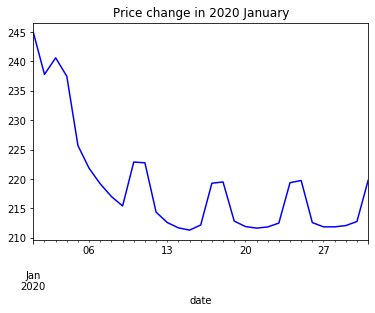

In [92]:
# Question 5
begin=pd.to_datetime("2020-01-01")
end=pd.to_datetime("2020-01-31")

df_calendar_2020=df_calendar.loc[(df_calendar["date"]>=begin) & (df_calendar["date"]<=end),:]
df_calendar_2020=df_calendar_2020.groupby("date")["price"].mean()
df_calendar_2020.plot(kind='line',x='date',y='price',color='blue')
plt.title('Price change in 2020 January')
df_calendar_2020.agg([np.mean,np.std])